In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("measurements.csv")

In [5]:
df.shape

(388, 12)

In [6]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


#方向性
・distance：対数変換
・specials, gas_type, refill gas：横持ち変換
・refill liters:欠損値補完は0or NaNのまま？

In [8]:
df.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [9]:
# カンマ→小数点変換
df['consume']= df['consume'].str.replace(',' ,  '.').astype(float)

In [10]:
df['temp_inside']= df['temp_inside'].str.replace(',' ,  '.').astype(float)

In [11]:
df['distance']= df['distance'].str.replace(',' ,  '.').astype(float)

In [12]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [13]:
# 変換後のデータ型確認
df.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters     object
refill gas        object
dtype: object

In [14]:
df = df.fillna(0)

In [15]:
df.isnull().any(axis = 0)

distance         False
consume          False
speed            False
temp_inside      False
temp_outside     False
specials         False
gas_type         False
AC               False
rain             False
sun              False
refill liters    False
refill gas       False
dtype: bool

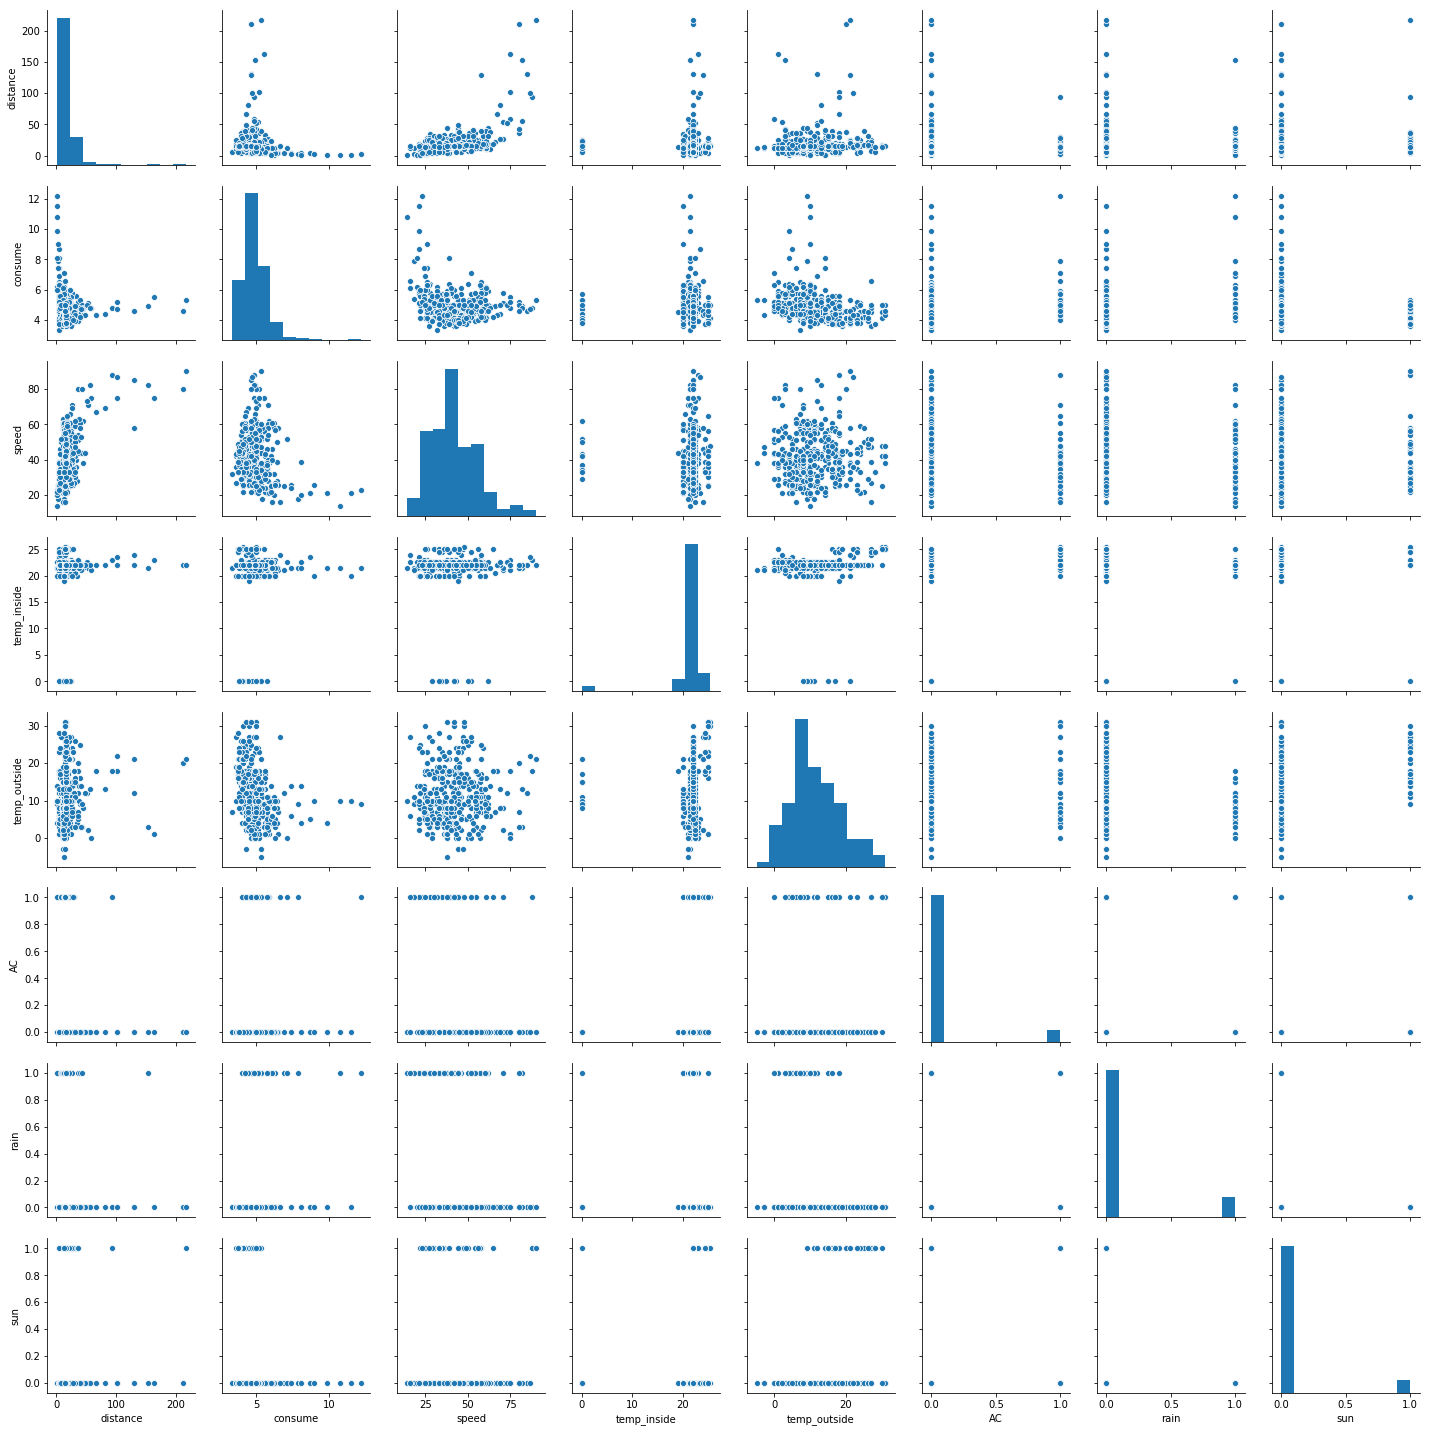

In [16]:
# 散布図行列を作成
import seaborn as sns
sns.pairplot(df)

In [17]:
# specials, gas_type, refill gas：横持ち変換
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [18]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,0,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,0,E10,0,0,0,0,0
2,11.2,5.5,38,21.5,15,0,E10,0,0,0,0,0
3,12.9,3.9,36,21.5,14,0,E10,0,0,0,0,0
4,18.5,4.5,46,21.5,15,0,E10,0,0,0,0,0


In [20]:
# specialsのユニークコードはAC（ac）,rain(halfあり),snow（halfあり）,sunの4分類ぽい
# →AC, rain, sunは既にone-hotになっているのでsnowだけ取り出す
pd.unique(df['specials'])

array([0, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [21]:
# gas_type, refill gasをone hot変換（specialsは）
new_data = pd.get_dummies(df['specials'])
new_data = new_data['snow']
new_data.head()

0    0
1    0
2    0
3    0
4    0
Name: snow, dtype: uint8

In [22]:
new_data2 = pd.get_dummies(df['gas_type'])
new_data2 = new_data2.rename(columns={'E10': 'gas_type_E10','SP98': 'gas_type_SP98' } )
new_data2.head()

,gas_type_E10,gas_type_SP98
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [23]:
new_data3 = pd.get_dummies(df['refill gas'])
new_data3 = new_data3.rename(columns={'E10': 'refill gas_E10','SP98': 'refil gas_SP98' } )
new_data3.head()

,0,refill gas_E10,refil gas_SP98
0,0,1,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [24]:
df_addcol = pd.concat([df, new_data, new_data2, new_data3], axis =1)
df_addcol.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,snow,gas_type_E10,gas_type_SP98,0,refill gas_E10,refil gas_SP98
0,28.0,5.0,26,21.5,12,0,E10,0,0,0,45,E10,0,1,0,0,1,0
1,12.0,4.2,30,21.5,13,0,E10,0,0,0,0,0,0,1,0,1,0,0
2,11.2,5.5,38,21.5,15,0,E10,0,0,0,0,0,0,1,0,1,0,0
3,12.9,3.9,36,21.5,14,0,E10,0,0,0,0,0,0,1,0,1,0,0
4,18.5,4.5,46,21.5,15,0,E10,0,0,0,0,0,0,1,0,1,0,0


In [25]:
df_drop = df_addcol[['specials', 'gas_type', 'refill gas']]
df_drop

,specials,gas_type,refill gas
0,0,E10,E10
1,0,E10,0
2,0,E10,0
3,0,E10,0
4,0,E10,0
5,0,E10,0
6,0,E10,0
7,0,E10,0
8,0,E10,0
9,0,E10,0


In [26]:
df.isnull().sum()

distance         0
consume          0
speed            0
temp_inside      0
temp_outside     0
specials         0
gas_type         0
AC               0
rain             0
sun              0
refill liters    0
refill gas       0
dtype: int64

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
df.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters     object
refill gas        object
dtype: object

In [30]:
X = df.iloc[:,[0,2,3,4,7,8,9]]
y = df.iloc[:,1]
X.head()

,distance,speed,temp_inside,temp_outside,AC,rain,sun
0,28.0,26,21.5,12,0,0,0
1,12.0,30,21.5,13,0,0,0
2,11.2,38,21.5,15,0,0,0
3,12.9,36,21.5,14,0,0,0
4,18.5,46,21.5,15,0,0,0


In [31]:
y.head()

0    5.0
1    4.2
2    5.5
3    3.9
4    4.5
Name: consume, dtype: float64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 1)

In [33]:
model = LinearRegression()

In [34]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
model.score(X_test,y_test)

0.19501638350157458

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
x = X.iloc[0,:]
x

distance        28.0
speed           26.0
temp_inside     21.5
temp_outside    12.0
AC               0.0
rain             0.0
sun              0.0
Name: 0, dtype: float64

In [38]:
y_pred = model.predict(X)

In [39]:
mean_absolute_error(y, y_pred)

0.6163693995547455

In [40]:
mean_squared_error(y, y_pred)

0.8479018687383845

In [41]:
np.sqrt(mean_squared_error(y, y_pred))

0.9208158712459209

In [ ]:
# 残課題
# べき変換
# 温度の差を作る